In [1]:
pip install pandas openpyxl


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

# Carregar o arquivo Excel
file_path = '/kaggle/input/balanco-energia-subsistema-2023/BALANCO_ENERGIA_SUBSISTEMA_2023.xlsx'

# Ler o arquivo Excel e criar um DataFrame
df = pd.read_excel(file_path, engine='openpyxl')

# Exibir as primeiras linhas do DataFrame
print(df.head())


  id_subsistena                nom_subsistema din_instante  val_gerhidraulica  \
0            NE                      NORDESTE   2023-01-01        3874.072998   
1             N                         NORTE   2023-01-01        7858.744141   
2           SIN  SISTEMA INTERLIGADO NACIONAL   2023-01-01       39057.309000   
3            SE          SUDESTE/CENTRO-OESTE   2023-01-01       24661.111328   
4             S                           SUL   2023-01-01        2663.381104   

   val_gertermica  val_gereolica  val_gersolar  val_carga  val_intercambio  
0      677.062988   13305.261719         1.932  10455.818         7402.512  
1      877.854980     211.772003         0.000   5990.553         2957.818  
2     5698.335000   14138.750000        21.155  58904.080           11.470  
3     4071.576904       6.000000        18.223  32183.885        -3426.974  
4       71.839996     615.716003         1.000  10273.827        -6921.890  


In [4]:
import pandas as pd

# Carregar o arquivo Excel
file_path = '/kaggle/input/balanco-energia-subsistema-2023/BALANCO_ENERGIA_SUBSISTEMA_2023.xlsx'

# Ler o arquivo Excel e criar um DataFrame
df = pd.read_excel(file_path, engine='openpyxl')

# Filtrar o DataFrame para manter apenas as linhas onde nom_subsistema é 'NORDESTE'
df_nordeste = df[df['nom_subsistema'] == 'NORDESTE']

# Exibir as primeiras linhas do DataFrame filtrado
print(df_nordeste.head())


   id_subsistena nom_subsistema        din_instante  val_gerhidraulica  \
0             NE       NORDESTE 2023-01-01 00:00:00        3874.072998   
5             NE       NORDESTE 2023-01-01 01:00:00        3374.273926   
10            NE       NORDESTE 2023-01-01 02:00:00        2631.370117   
15            NE       NORDESTE 2023-01-01 03:00:00        2539.760010   
20            NE       NORDESTE 2023-01-01 04:00:00        2526.229980   

    val_gertermica  val_gereolica  val_gersolar  val_carga  val_intercambio  
0       677.062988   13305.261719         1.932  10455.818         7402.512  
5       678.442017   12960.626953         1.013  10481.710         6532.646  
10      678.745972   12754.953125         0.933  10475.740         5590.262  
15      675.986023   12524.643555         0.365  10404.682         5336.073  
20      682.583984   12423.535156         1.705  10274.923         5359.131  


/tmp/ipykernel_33/3533558479.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nordeste['din_instante'] = pd.to_datetime(df_nordeste['din_instante'])


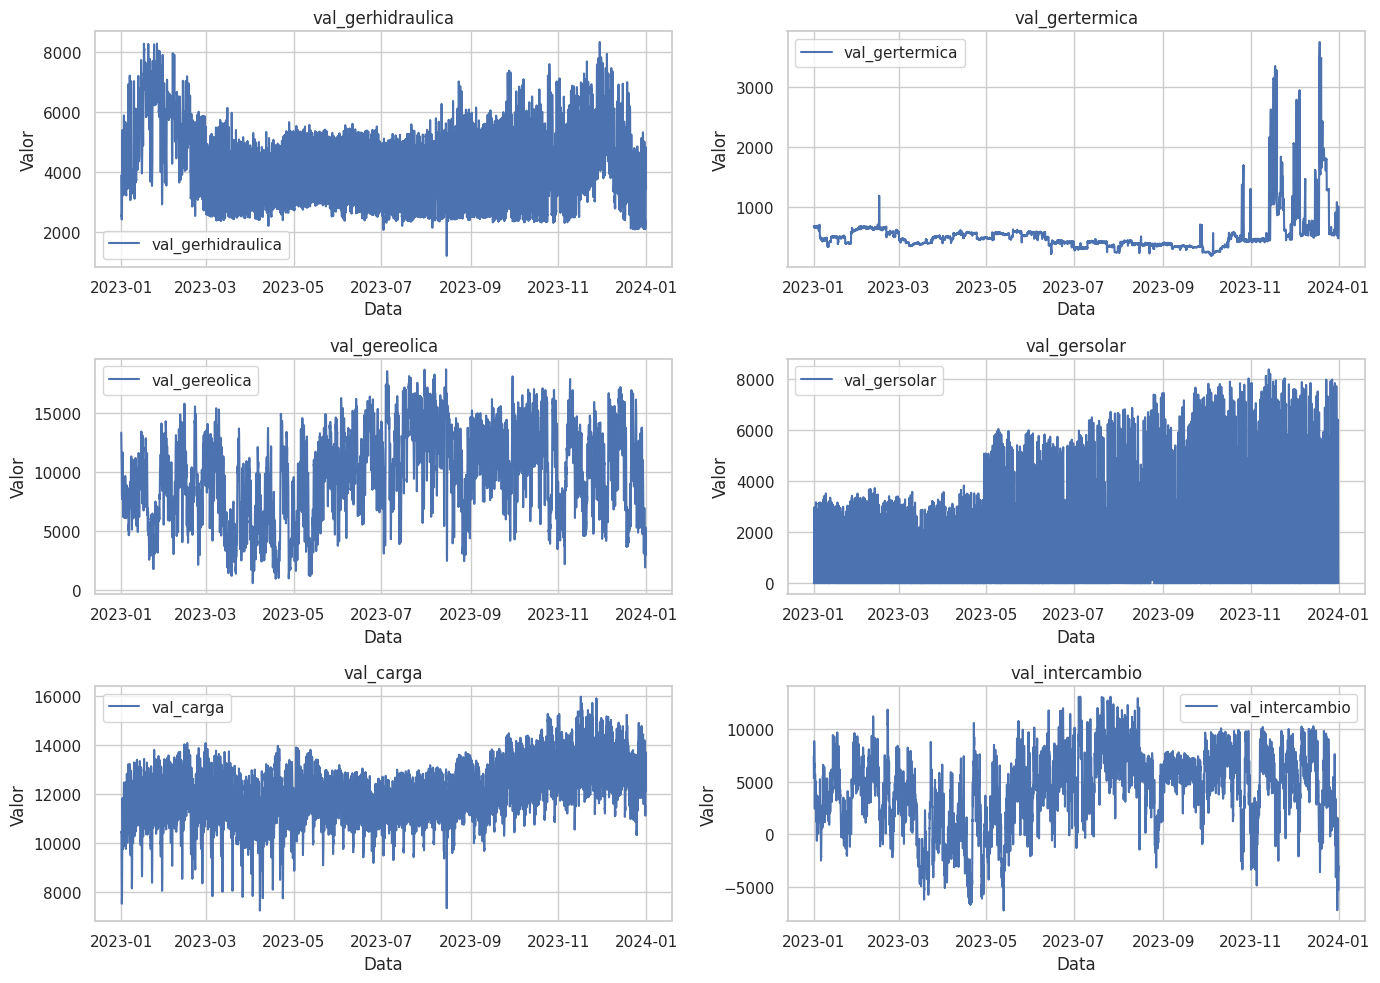

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo Excel
file_path = '/kaggle/input/balanco-energia-subsistema-2023/BALANCO_ENERGIA_SUBSISTEMA_2023.xlsx'

# Ler o arquivo Excel e criar um DataFrame
df = pd.read_excel(file_path, engine='openpyxl')

# Filtrar o DataFrame para manter apenas as linhas onde nom_subsistema é 'NORDESTE'
df_nordeste = df[df['nom_subsistema'] == 'NORDESTE']

# Converter a coluna 'din_instante' para datetime
df_nordeste['din_instante'] = pd.to_datetime(df_nordeste['din_instante'])

# Definir o estilo dos gráficos
sns.set(style="whitegrid")

# Criar uma figura com múltiplos subplots
plt.figure(figsize=(14, 10))

# Plotar cada série temporal em um subplot separado
for i, column in enumerate(['val_gerhidraulica', 'val_gertermica', 'val_gereolica', 'val_gersolar', 'val_carga', 'val_intercambio']):
    plt.subplot(3, 2, i + 1)
    plt.plot(df_nordeste['din_instante'], df_nordeste[column], label=column)
    plt.title(column)
    plt.xlabel('Data')
    plt.ylabel('Valor')
    plt.legend()

# Ajustar o layout e exibir os gráficos
plt.tight_layout()
plt.show()


In [12]:
pip install statsmodels pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.2 MB/s eta 0:00:0000:010:01
Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_33/650311390.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nordeste['din_instante'] = pd.to_datetime(df_nordeste['din_instante'])


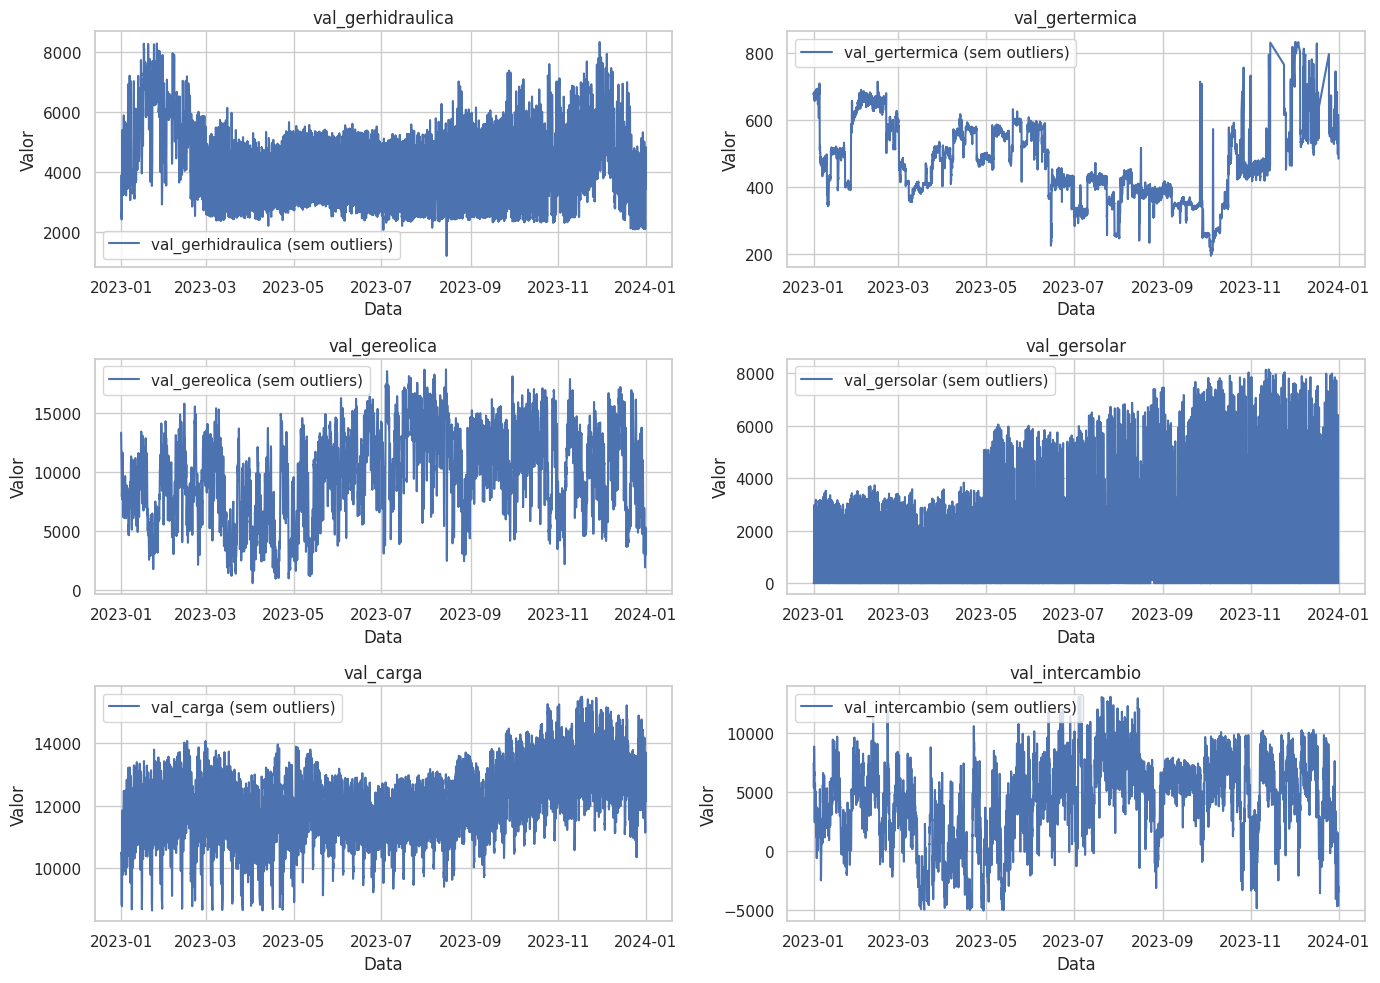

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Função para remover outliers usando o método IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Carregar o arquivo Excel
file_path = '/kaggle/input/balanco-energia-subsistema-2023/BALANCO_ENERGIA_SUBSISTEMA_2023.xlsx'

# Ler o arquivo Excel e criar um DataFrame
df = pd.read_excel(file_path, engine='openpyxl')

# Filtrar o DataFrame para manter apenas as linhas onde nom_subsistema é 'NORDESTE'
df_nordeste = df[df['nom_subsistema'] == 'NORDESTE']

# Converter a coluna 'din_instante' para datetime
df_nordeste['din_instante'] = pd.to_datetime(df_nordeste['din_instante'])

# Definir o estilo dos gráficos
sns.set(style="whitegrid")

# Criar uma figura com múltiplos subplots
plt.figure(figsize=(14, 10))

# Plotar cada série temporal em um subplot separado
for i, column in enumerate(['val_gerhidraulica', 'val_gertermica', 'val_gereolica', 'val_gersolar', 'val_carga', 'val_intercambio']):
    plt.subplot(3, 2, i + 1)
    
    # Remover outliers
    df_filtered = remove_outliers_iqr(df_nordeste, column)
    
    # Plotar a série temporal sem outliers
    plt.plot(df_filtered['din_instante'], df_filtered[column], label=f'{column} (sem outliers)')
    plt.title(column)
    plt.xlabel('Data')
    plt.ylabel('Valor')
    plt.legend()

# Ajustar o layout e exibir os gráficos
plt.tight_layout()
plt.show()


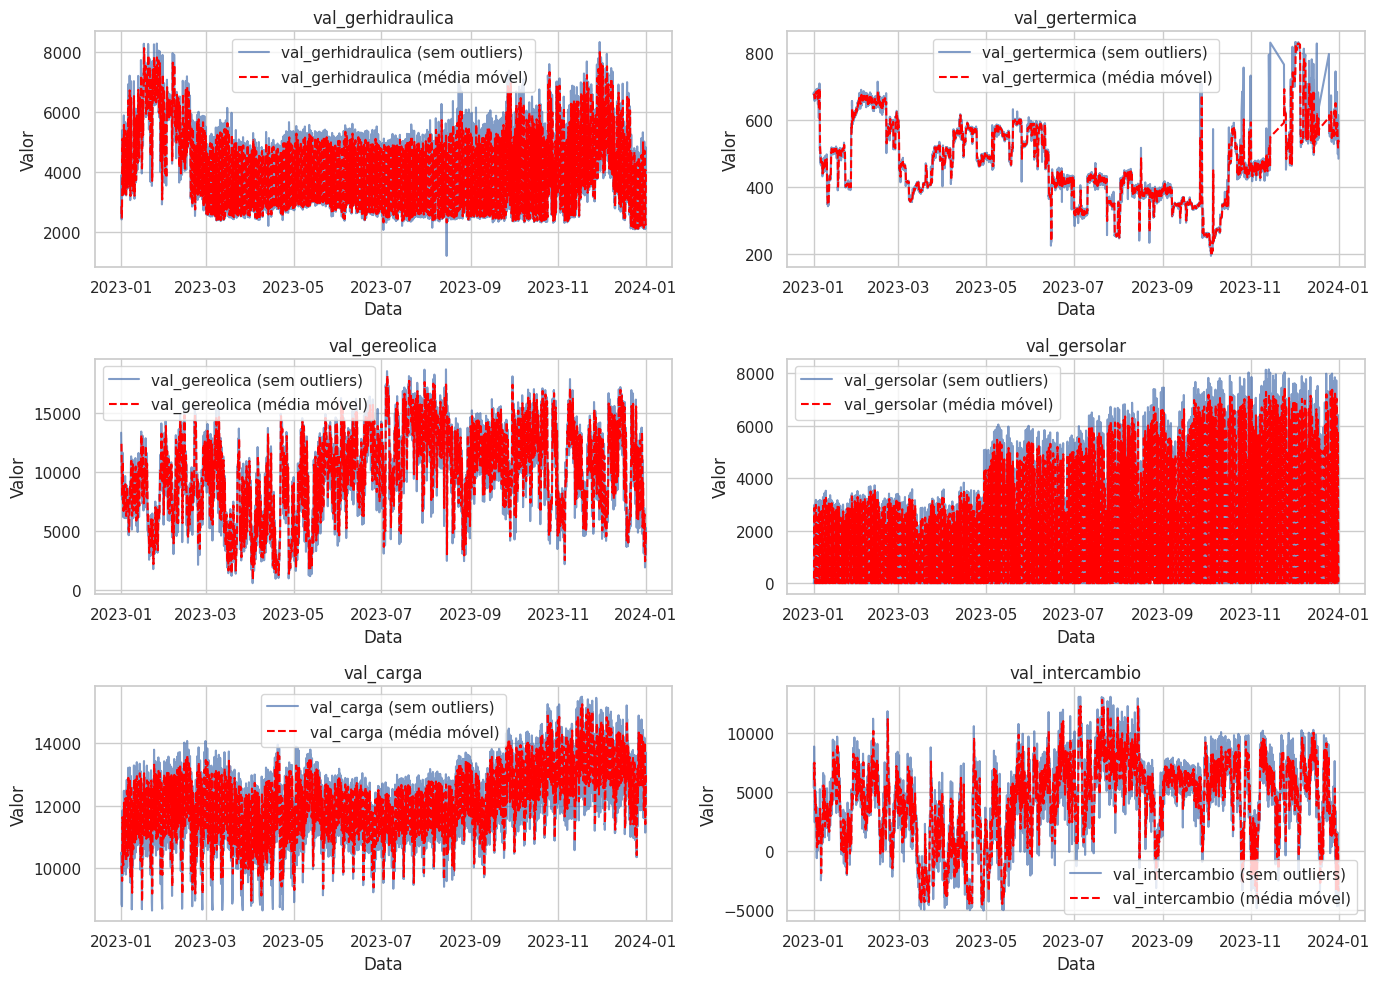

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Função para remover outliers usando o método IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()

# Carregar o arquivo Excel
file_path = '/kaggle/input/balanco-energia-subsistema-2023/BALANCO_ENERGIA_SUBSISTEMA_2023.xlsx'

# Ler o arquivo Excel e criar um DataFrame
df = pd.read_excel(file_path, engine='openpyxl')

# Filtrar o DataFrame para manter apenas as linhas onde nom_subsistema é 'NORDESTE'
df_nordeste = df[df['nom_subsistema'] == 'NORDESTE'].copy()

# Converter a coluna 'din_instante' para datetime
df_nordeste.loc[:, 'din_instante'] = pd.to_datetime(df_nordeste['din_instante'])

# Definir o estilo dos gráficos
sns.set(style="whitegrid")

# Criar uma figura com múltiplos subplots
plt.figure(figsize=(14, 10))

# Definir o período para a média móvel
window_size = 7  # Você pode ajustar este valor conforme necessário

# Plotar cada série temporal em um subplot separado
for i, column in enumerate(['val_gerhidraulica', 'val_gertermica', 'val_gereolica', 'val_gersolar', 'val_carga', 'val_intercambio']):
    plt.subplot(3, 2, i + 1)
    
    # Remover outliers e fazer uma cópia explícita
    df_filtered = remove_outliers_iqr(df_nordeste, column)
    
    # Calcular a média móvel
    df_filtered.loc[:, 'rolling_mean'] = df_filtered[column].rolling(window=window_size).mean()
    
    # Plotar a série temporal sem outliers e a média móvel
    plt.plot(df_filtered['din_instante'], df_filtered[column], label=f'{column} (sem outliers)', alpha=0.7)
    plt.plot(df_filtered['din_instante'], df_filtered['rolling_mean'], label=f'{column} (média móvel)', color='red', linestyle='--')
    plt.title(column)
    plt.xlabel('Data')
    plt.ylabel('Valor')
    plt.legend()

# Ajustar o layout e exibir os gráficos
plt.tight_layout()
plt.show()


/tmp/ipykernel_33/2594523025.py:31: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_nordeste = df_nordeste.asfreq('H')
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:47

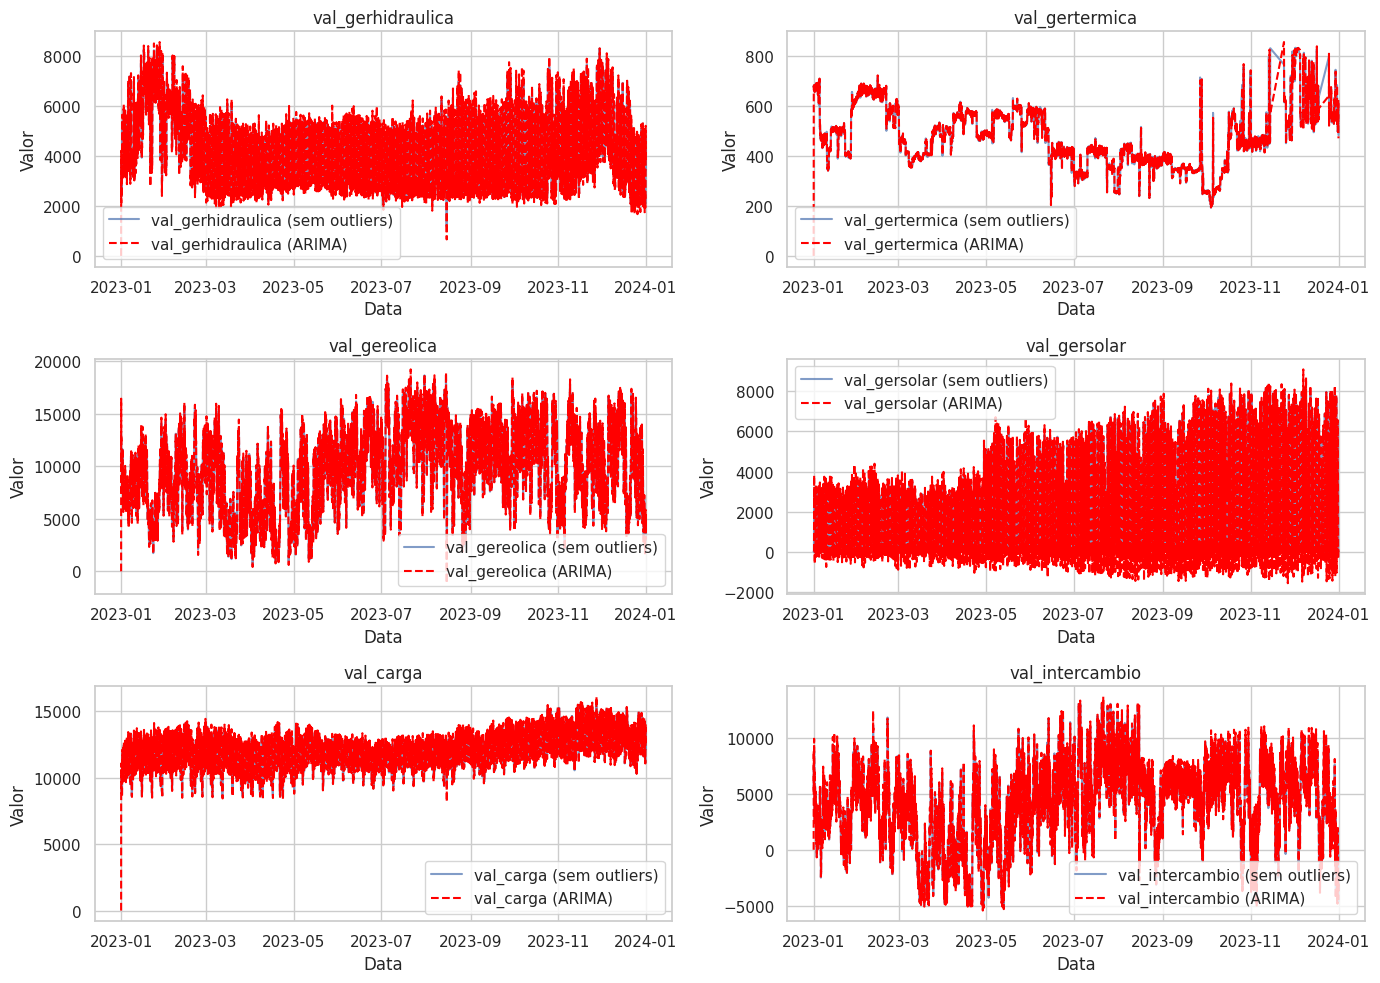

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

# Função para remover outliers usando o método IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()

# Carregar o arquivo Excel
file_path = '/kaggle/input/balanco-energia-subsistema-2023/BALANCO_ENERGIA_SUBSISTEMA_2023.xlsx'

# Ler o arquivo Excel e criar um DataFrame
df = pd.read_excel(file_path, engine='openpyxl')

# Filtrar o DataFrame para manter apenas as linhas onde nom_subsistema é 'NORDESTE'
df_nordeste = df[df['nom_subsistema'] == 'NORDESTE'].copy()

# Converter a coluna 'din_instante' para datetime
df_nordeste['din_instante'] = pd.to_datetime(df_nordeste['din_instante'])

# Definir a coluna 'din_instante' como o índice
df_nordeste.set_index('din_instante', inplace=True)

# Garantir que o índice tenha uma frequência definida (por exemplo, hourly)
df_nordeste = df_nordeste.asfreq('H')

# Definir o estilo dos gráficos
sns.set(style="whitegrid")

# Criar uma figura com múltiplos subplots
plt.figure(figsize=(14, 10))

# Definir o período para a média móvel
window_size = 7  # Você pode ajustar este valor conforme necessário

# Plotar cada série temporal em um subplot separado
for i, column in enumerate(['val_gerhidraulica', 'val_gertermica', 'val_gereolica', 'val_gersolar', 'val_carga', 'val_intercambio']):
    plt.subplot(3, 2, i + 1)
    
    # Remover outliers e fazer uma cópia explícita
    df_filtered = remove_outliers_iqr(df_nordeste, column)
    
    # Ajustar o modelo ARIMA
    try:
        # Configurar e ajustar o modelo ARIMA
        model = ARIMA(df_filtered[column].dropna(), order=(5, 1, 0))  # Ajuste os parâmetros (p, d, q) conforme necessário
        model_fit = model.fit()
        
        # Prever a série temporal
        df_filtered['arima_prediction'] = model_fit.predict(start=0, end=len(df_filtered)-1, dynamic=False)
        
        # Plotar a série temporal sem outliers e a previsão ARIMA
        plt.plot(df_filtered.index, df_filtered[column], label=f'{column} (sem outliers)', alpha=0.7)
        plt.plot(df_filtered.index, df_filtered['arima_prediction'], label=f'{column} (ARIMA)', color='red', linestyle='--')
        plt.title(column)
        plt.xlabel('Data')
        plt.ylabel('Valor')
        plt.legend()
        
    except Exception as e:
        print(f"Erro ao ajustar ARIMA para {column}: {e}")

# Ajustar o layout e exibir os gráficos
plt.tight_layout()
plt.show()
